In [136]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
# Loading dataset
data_train = pd.read_csv('train.csv')

In [138]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Dealing with null values

In [141]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [142]:
val = data_train.Cabin.value_counts().head(5)
data_train['Cabin'] = data_train['Cabin'].fillna(np.random.choice(val))

In [143]:
data_train.Embarked.value_counts()
data_train['Embarked'] = data_train.Embarked.fillna(np.random.choice(['S','C','Q']))

### looking for corelation 

<AxesSubplot:>

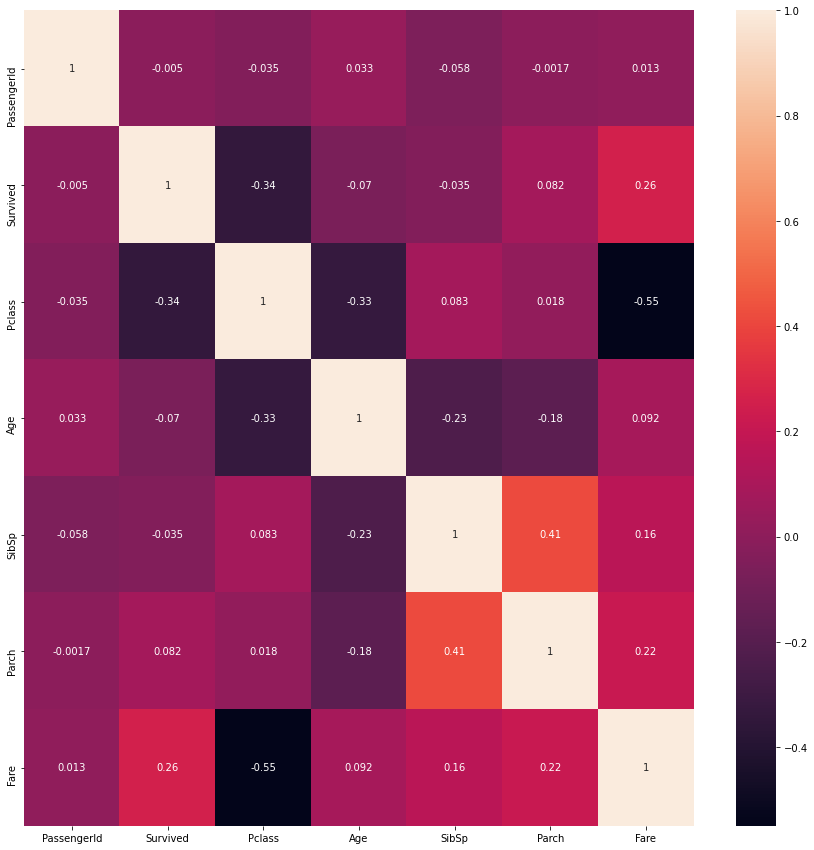

In [144]:
plt.figure(figsize= (15,15))
corr = data_train.corr()
sns.heatmap(corr,annot=True)

In [145]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [146]:
data_train.drop('Name',axis=1,inplace=True)

In [147]:
sex = pd.get_dummies(data = data_train['Sex'])

In [148]:
data_train = data_train.join(sex)

In [149]:
data_train.drop(['Sex','male','Ticket'],axis=1,inplace=True)

In [150]:
r = pd.get_dummies(data_train.Embarked,drop_first=True)

In [151]:
data_train = data_train.join(r)

In [152]:
data_train.drop('Embarked',inplace=True,axis=1)
data_train.drop('Cabin',inplace=True,axis=1)

In [153]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


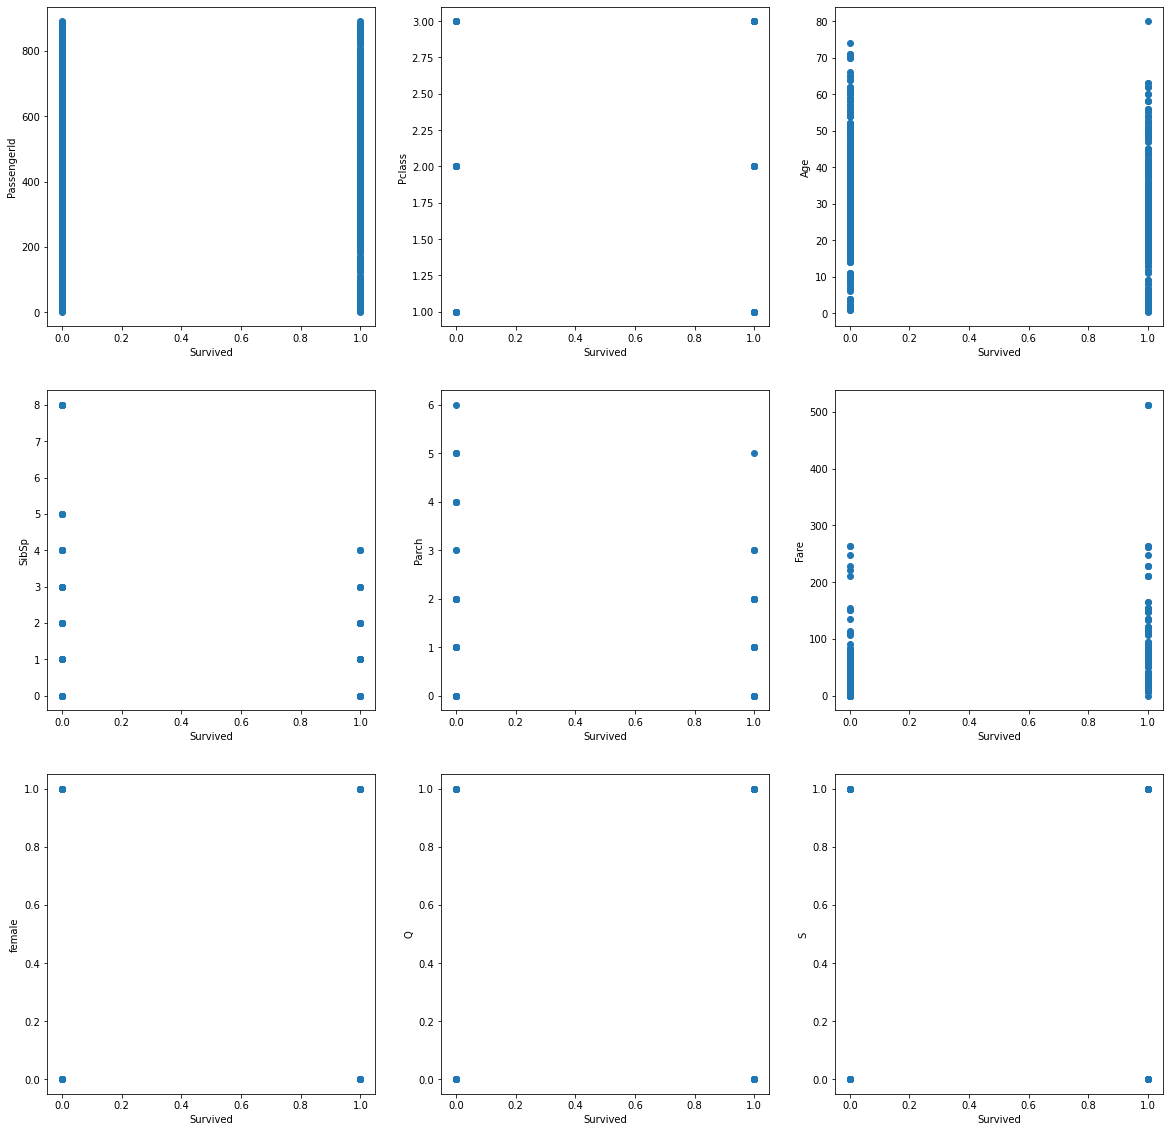

In [154]:
plt.figure(figsize=(20,20))
pltnum = 1
X = data_train.drop('Survived',axis=1)
y = data_train['Survived']
for i in X.columns:
    if pltnum <= 9:
        ax = plt.subplot(3,3,pltnum)
        plt.scatter(x=y,y=X[i])
        plt.ylabel(i)
        plt.xlabel('Survived')
    pltnum+=1

# Logistic Regression

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [157]:
predict = lr.predict(X_test)

In [158]:
pd.DataFrame(predict).shape

(268, 1)

In [159]:
X_test['Survived']= predict

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
X_test.tail(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,Q,S,Survived
265,266,2,36.000000,0,0,10.5000,0,0,1,0
133,134,2,29.000000,1,0,26.0000,1,0,1,1
708,709,1,22.000000,0,0,151.5500,1,0,1,1
544,545,1,50.000000,1,0,106.4250,0,0,0,0
346,347,2,40.000000,0,0,13.0000,1,0,1,1
821,822,3,27.000000,0,0,8.6625,0,0,1,0
633,634,1,29.699118,0,0,0.0000,0,0,1,0
456,457,1,65.000000,0,0,26.5500,0,0,1,0
500,501,3,17.000000,0,0,8.6625,0,0,1,0
430,431,1,28.000000,0,0,26.5500,0,0,1,0


In [161]:
from sklearn.metrics import confusion_matrix
acc = confusion_matrix(y_test,predict)
acc

array([[135,  22],
       [ 31,  80]], dtype=int64)

In [162]:
from sklearn.metrics import accuracy_score
acc_scr = accuracy_score(y_test,predict)
acc_scr

0.8022388059701493

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

